In [15]:
import os
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True) #do not miss this line

from gensim import corpora, models, similarities

import warnings
warnings.filterwarnings("ignore")
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [19]:
import pandas as pd
os.chdir('C:\\Users\\Glynis\\Documents\\MSc A U Chicago\\Capstone')
datafile=pd.read_csv('sampleddata2.csv',encoding='latin1')
datafile=datafile[~(datafile['created_at'].str.len() < 30)]
tweets = datafile.assign(Time=pd.to_datetime(datafile.created_at)).drop('id', axis='columns')

In [20]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
tweets['Time'] = pd.to_datetime(tweets['Time'], format='%y-%m-%d %H:%M:%S')
tweetsT = tweets['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Time',
    height=450,
    width=1200,
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [21]:
corpus=[]
a=[]
for i in range(len(tweets['text'])):
        a=tweets['text'][i]
        corpus.append(a)
        
#corpus[0:5]

In [33]:
import gensim
import logging
import tempfile

TEMP_FOLDER = tempfile.gettempdir()

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from nltk.corpus import stopwords
from string import punctuation

# remove common words and tokenize
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)

2018-08-11 22:41:13,783 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-08-11 22:41:13,971 : INFO : adding document #10000 to Dictionary(27633 unique tokens: ['(1,', '(2,', '(3,', '(4,', '(5,']...)
2018-08-11 22:41:14,194 : INFO : adding document #20000 to Dictionary(47072 unique tokens: ['(1,', '(2,', '(3,', '(4,', '(5,']...)
2018-08-11 22:41:14,388 : INFO : adding document #30000 to Dictionary(64799 unique tokens: ['(1,', '(2,', '(3,', '(4,', '(5,']...)
2018-08-11 22:41:14,478 : INFO : built Dictionary(72630 unique tokens: ['(1,', '(2,', '(3,', '(4,', '(5,']...) from 34791 documents (total 698537 corpus positions)
2018-08-11 22:41:14,480 : INFO : saving Dictionary object under C:\Users\Glynis\AppData\Local\Temp\elon.dict, separately None
2018-08-11 22:41:14,507 : INFO : saved C:\Users\Glynis\AppData\Local\Temp\elon.dict


In [23]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  # store to disk, for later use
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

2018-08-11 22:31:37,792 : INFO : storing corpus in Matrix Market format to C:\Users\Glynis\AppData\Local\Temp\elon.mm
2018-08-11 22:31:37,793 : INFO : saving sparse matrix to C:\Users\Glynis\AppData\Local\Temp\elon.mm
2018-08-11 22:31:37,794 : INFO : PROGRESS: saving document #0
2018-08-11 22:31:37,813 : INFO : PROGRESS: saving document #1000
2018-08-11 22:31:37,831 : INFO : PROGRESS: saving document #2000
2018-08-11 22:31:37,852 : INFO : PROGRESS: saving document #3000
2018-08-11 22:31:37,872 : INFO : PROGRESS: saving document #4000
2018-08-11 22:31:37,889 : INFO : PROGRESS: saving document #5000
2018-08-11 22:31:37,907 : INFO : PROGRESS: saving document #6000
2018-08-11 22:31:37,930 : INFO : PROGRESS: saving document #7000
2018-08-11 22:31:37,947 : INFO : PROGRESS: saving document #8000
2018-08-11 22:31:37,966 : INFO : PROGRESS: saving document #9000
2018-08-11 22:31:37,983 : INFO : PROGRESS: saving document #10000
2018-08-11 22:31:38,002 : INFO : PROGRESS: saving document #11000
201

In [24]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [25]:
total_topics = 10
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2018-08-11 22:32:04,103 : INFO : using symmetric alpha at 0.1
2018-08-11 22:32:04,106 : INFO : using symmetric eta at 0.1
2018-08-11 22:32:04,117 : INFO : using serial LDA version on this node
2018-08-11 22:32:04,235 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 34791 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2018-08-11 22:32:04,237 : INFO : PROGRESS: pass 0, at document #2000/34791
2018-08-11 22:32:05,381 : INFO : merging changes from 2000 documents into a model of 34791 documents
2018-08-11 22:32:05,489 : INFO : topic #5 (0.100): 0.039*"new" + 0.039*"mk" + 0.039*"coming!" + 0.039*"v" + 0.039*"epic" + 0.039*"franchise." + 0.039*"sf" + 0.039*"#youwontknowuntilyouplay" + 0.039*"miss" + 0.037*"https://t.co/ncws7ogwc0"
2018-08-11 22:32:05,491 : INFO : topic #0 (0.100): 0.036*"mortal" + 0.031*"kombat" + 0.013*"de" + 0.009*"@you

2018-08-11 22:32:08,578 : INFO : topic #5 (0.100): 0.076*"new" + 0.068*"mk" + 0.062*"epic" + 0.062*"miss" + 0.062*"v" + 0.061*"sf" + 0.061*"franchise." + 0.060*"coming!" + 0.060*"#youwontknowuntilyouplay" + 0.056*"https://t.co/ncws7ogwc0"
2018-08-11 22:32:08,581 : INFO : topic diff=0.276409, rho=0.408248
2018-08-11 22:32:08,583 : INFO : PROGRESS: pass 0, at document #14000/34791
2018-08-11 22:32:08,945 : INFO : merging changes from 2000 documents into a model of 34791 documents
2018-08-11 22:32:09,030 : INFO : topic #4 (0.100): 0.032*"#injustice2" + 0.012*"2" + 0.009*"injustice" + 0.007*"@noobde" + 0.007*"@netherrealm" + 0.007*"#mortalkombat" + 0.006*"like" + 0.005*"i'm" + 0.004*"mortal" + 0.004*"kombat,"
2018-08-11 22:32:09,032 : INFO : topic #3 (0.100): 0.069*"mortal" + 0.067*"kombat" + 0.027*"porn" + 0.026*"sex" + 0.021*"girls" + 0.020*"nude" + 0.019*"naked" + 0.013*"free" + 0.011*"sexy" + 0.011*"video"
2018-08-11 22:32:09,034 : INFO : topic #8 (0.100): 0.054*"mortal" + 0.045*"komba

2018-08-11 22:32:11,976 : INFO : topic diff=0.306549, rho=0.288675
2018-08-11 22:32:11,977 : INFO : PROGRESS: pass 0, at document #26000/34791
2018-08-11 22:32:12,313 : INFO : merging changes from 2000 documents into a model of 34791 documents
2018-08-11 22:32:12,399 : INFO : topic #4 (0.100): 0.033*"#injustice2" + 0.008*"2" + 0.007*"injustice" + 0.007*"i'm" + 0.007*"@netherrealm" + 0.006*"#mortalkombat" + 0.005*"@noobde" + 0.004*"super" + 0.004*"come" + 0.004*"gear"
2018-08-11 22:32:12,400 : INFO : topic #6 (0.100): 0.097*"mortal" + 0.094*"kombat" + 0.059*"@youtube" + 0.031*"video" + 0.026*"de" + 0.020*"liked" + 0.016*"imagine" + 0.016*"toolset" + 0.016*"remade" + 0.016*"aurora"
2018-08-11 22:32:12,402 : INFO : topic #7 (0.100): 0.113*"mortal" + 0.111*"kombat" + 0.062*"remake" + 0.061*"everyone" + 0.061*"using" + 0.061*"care" + 0.034*"1" + 0.033*"cube" + 0.028*"unreal" + 0.028*"engine"
2018-08-11 22:32:12,404 : INFO : topic #9 (0.100): 0.034*"mortal" + 0.033*"de" + 0.021*"kombat" + 0.

In [26]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

[(0,
  '0.046*"mortal" + 0.024*"kombat" + 0.011*"de" + 0.009*"kombat." + 0.008*"eu"'),
 (1,
  '0.037*"kombat" + 0.031*"mortal" + 0.029*"??" + 0.026*"?????" + 0.023*"???"'),
 (2,
  '0.030*"@netherrealm" + 0.019*"kombat" + 0.016*"@noobde" + 0.012*"live" + 0.009*"(mortal"'),
 (3,
  '0.065*"mortal" + 0.063*"kombat" + 0.033*"porn" + 0.033*"sex" + 0.022*"nude"'),
 (4,
  '0.030*"#injustice2" + 0.009*"injustice" + 0.009*"2" + 0.007*"@netherrealm" + 0.007*"i\'m"'),
 (5, '0.080*"new" + 0.070*"mk" + 0.066*"miss" + 0.066*"epic" + 0.065*"v"'),
 (6,
  '0.097*"mortal" + 0.094*"kombat" + 0.062*"@youtube" + 0.031*"video" + 0.027*"de"'),
 (7,
  '0.112*"mortal" + 0.111*"kombat" + 0.063*"remake" + 0.063*"everyone" + 0.063*"using"'),
 (8,
  '0.065*"mortal" + 0.051*"kombat" + 0.016*"like" + 0.012*"game" + 0.009*"play"'),
 (9,
  '0.035*"de" + 0.032*"mortal" + 0.021*"kombat" + 0.021*"que" + 0.020*"en"')]

(207, 10)
(10, 207)


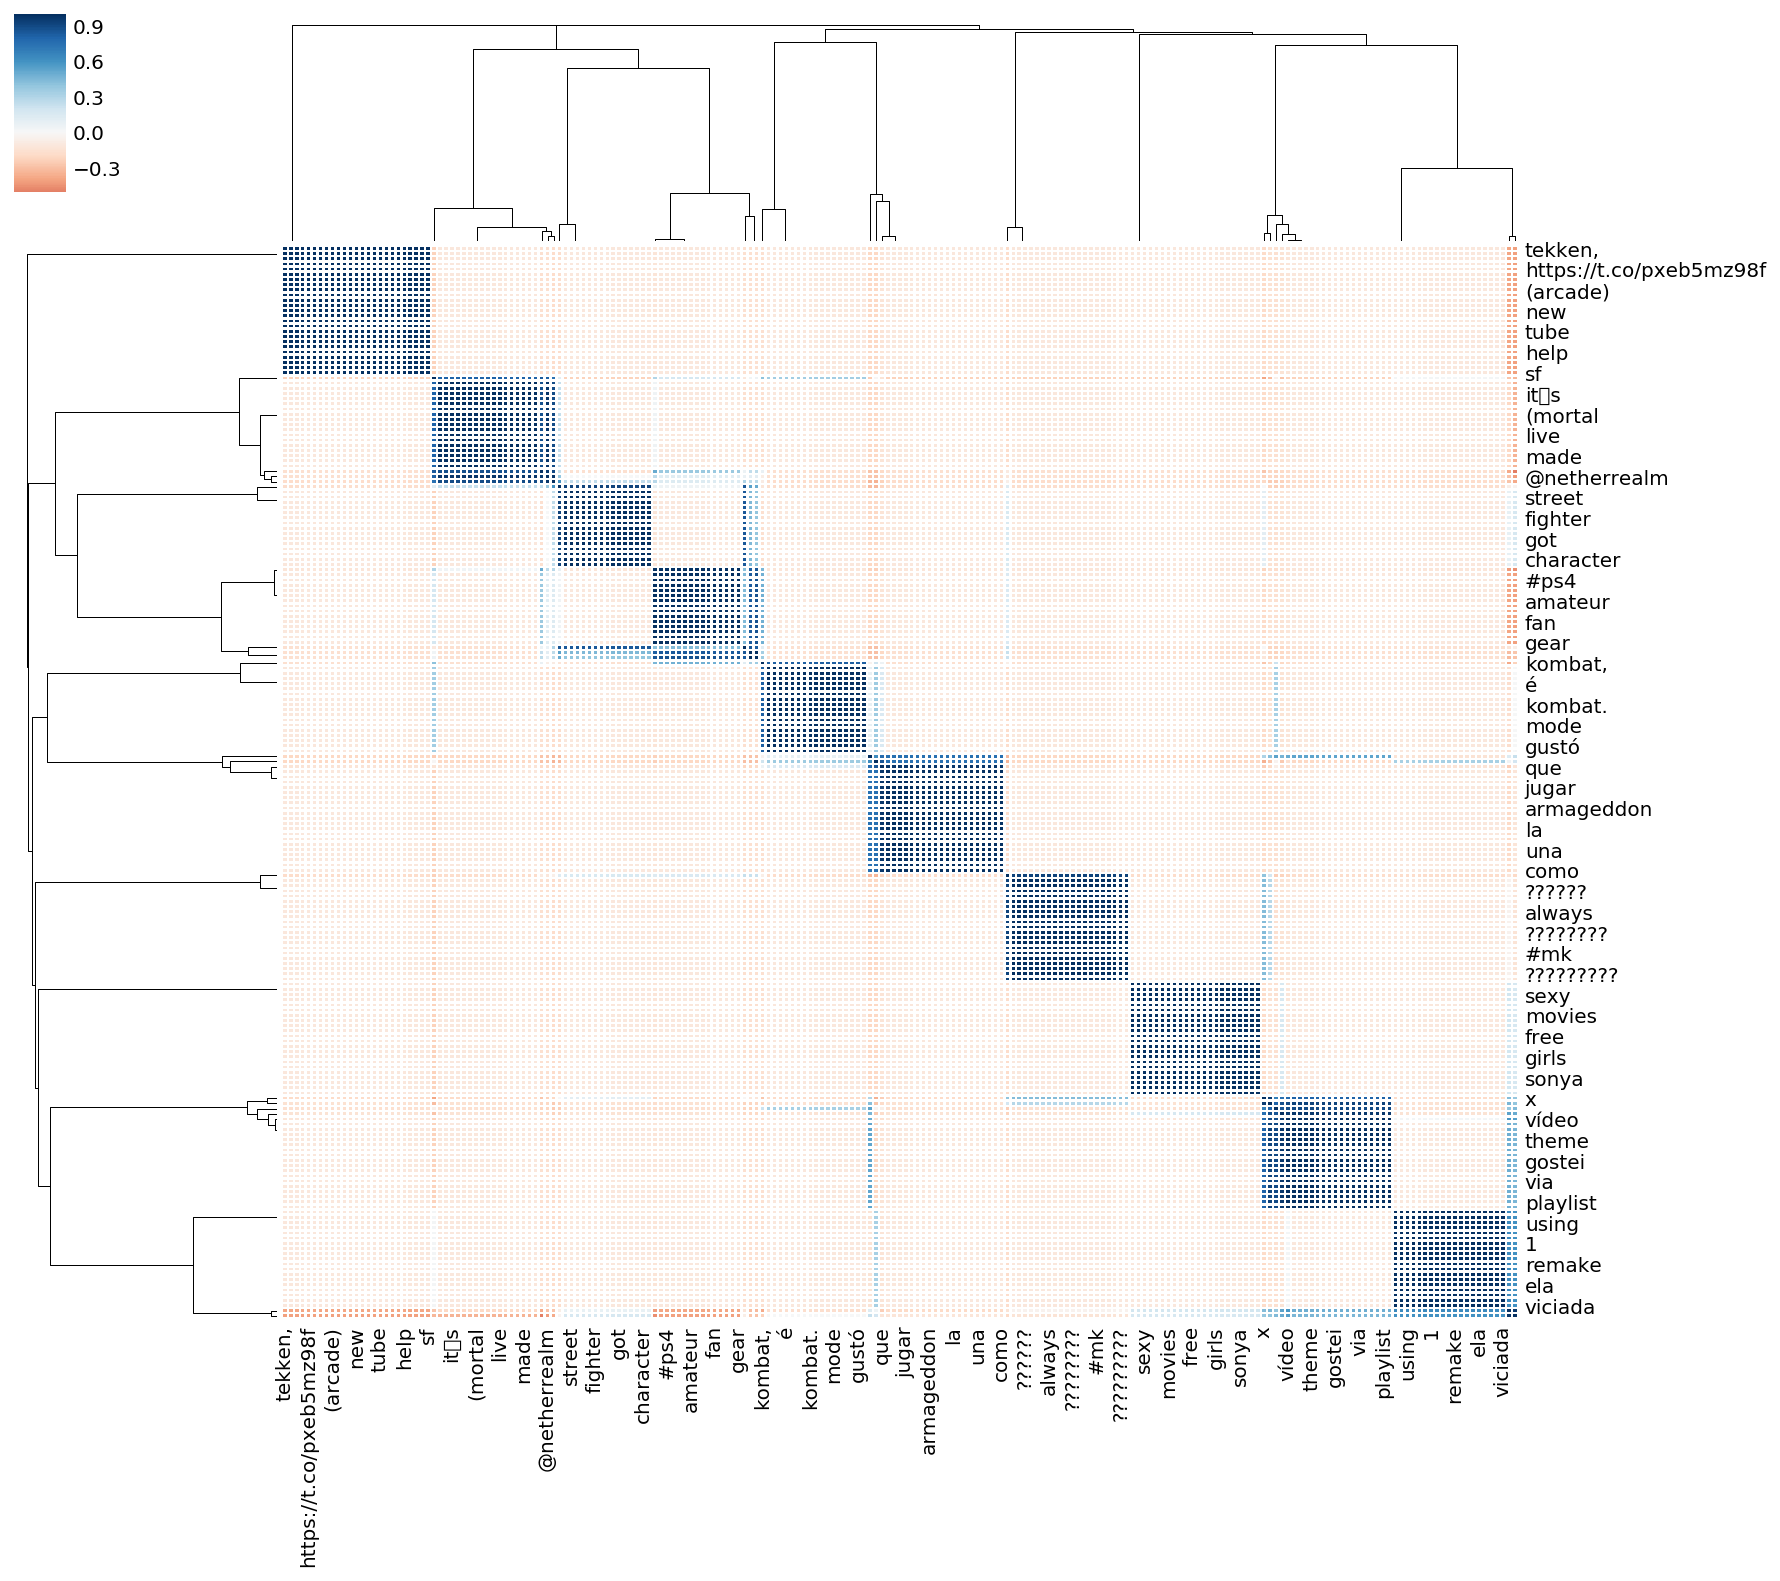

In [27]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda

import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [28]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

C:\Users\Glynis\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
6      34.067043        1       1   20.223562  -54.800880
1      21.197135        1       2   85.153954  -82.919296
8       9.726106        1       3    8.714238   68.314171
7       5.007197        1       4  128.056961  -17.943121
3       5.000626        1       5   66.117676  -14.501037
0       5.000538        1       6   79.022995   49.087666
9       5.000452        1       7  -54.333885   13.695226
2       5.000342        1       8  -44.650623  -58.632256
4       5.000332        1       9    8.234614    5.136886
5       5.000228        1      10   14.732113 -116.568611, topic_info=     Category         Freq                      Term        Total  loglift  \
term                                                                         
3     Default  2057.000000                    mortal  2057.000000  30.0000   
2     Default  1979.000000                    kombat  1979.000000  29.0000   
24    Default   754.000000                  @youtube   754.000000  28.0000   
25    Default   405.000000                        de   405.000000  27.0000   
94    Default   138.000000                       new   138.000000  26.0000   
93    Default   122.000000                        mk   122.000000  25.0000   
92    Default   115.000000                      miss   115.000000  24.0000   
89    Default   114.000000                      epic   114.000000  23.0000   
96    Default   113.000000                         v   113.000000  22.0000   
95    Default   112.000000                        sf   112.000000  21.0000   
88    Default   111.000000                   coming!   111.000000  20.0000   
90    Default   111.000000                franchise.   111.000000  19.0000   
86    Default   111.000000  #youwontknowuntilyouplay   111.000000  18.0000   
22    Default   110.000000                    remake   110.000000  17.0000   
21    Default   110.000000                  everyone   110.000000  16.0000   
23    Default   109.000000                     using   109.000000  15.0000   
19    Default   109.000000                      care   109.000000  14.0000   
39    Default   387.000000                     video   387.000000  13.0000   
458   Default   216.000000                        ??   216.000000  12.0000   
91    Default   102.000000   https://t.co/ncws7ogwc0   102.000000  11.0000   
543   Default   188.000000                     ?????   188.000000  10.0000   
35    Default   266.000000                     liked   266.000000   9.0000   
469   Default   171.000000                       ???   171.000000   8.0000   
32    Default   210.000000                     vídeo   210.000000   7.0000   
31    Default   186.000000                        um   186.000000   6.0000   
1     Default   172.000000                   imagine   172.000000   5.0000   
20    Default    60.000000                      cube    60.000000   4.0000   
4     Default   169.000000                    remade   169.000000   3.0000   
0     Default   168.000000                    aurora   168.000000   2.0000   
5     Default   168.000000                   toolset   168.000000   1.0000   
...       ...          ...                       ...          ...      ...   
86    Topic10   111.784604  #youwontknowuntilyouplay   111.863629   2.9950   
88    Topic10   111.894696                   coming!   111.973878   2.9950   
90    Topic10   111.847064                franchise.   111.926865   2.9950   
92    Topic10   114.926462                      miss   115.008941   2.9950   
96    Topic10   113.842526                         v   113.925402   2.9950   
89    Topic10   114.477821                      epic   114.563080   2.9949   
91    Topic10   102.410777   https://t.co/ncws7ogwc0   102.489494   2.9949   
93    Topic10   122.380423                        mk   122.481279   2.9949   
94    Topic10   138.778359                       new   138.9704

In [ ]:
#tweets with noobde

In [43]:
noobde = tweets[tweets['text'].str.contains("noobde")]

noobde.reset_index(drop=True,inplace=True)
noobde.head()

,Unnamed: 0,_id,created_at,display_text_range,filter_level,geo,id_str,lang,text,sentiment,Time
0,397462,5b45712ed6de871ae866e7b0,Wed Jul 11 02:53:33 +0000 2018,"[21, 100]",low,NaN,1.020000e+18,en,@noobde @NetherRealm Fuck giving us something ...,1,2018-07-11 02:53:33
1,146850,5aba967cd6de87253af6013e,Tue Mar 27 19:07:39 +0000 2018,"[66, 98]",low,NaN,9.790000e+17,en,@Zelina_VegaWWE @BillieKayWWE @noobde @tylerla...,1,2018-03-27 19:07:39
2,461892,5b541c8ad6de8742c438dd89,Sun Jul 22 05:56:26 +0000 2018,NaN,low,NaN,1.020910e+18,en,"@noobde Now, Mortal Kombat deserves to have an...",1,2018-07-22 05:56:26
3,42203,5a8facb4d6de8735a9b230fd,Fri Feb 23 05:54:59 +0000 2018,"[55, 55]",low,NaN,9.670000e+17,und,@L_a_T_e_R @iNicki11 @IGN @noobde @NetherRealm...,1,2018-02-23 05:54:59
4,324413,5b23488bd6de8723a6109633,Fri Jun 15 05:03:07 +0000 2018,"[38, 112]",low,NaN,1.007490e+18,en,@noobde @NetherRealm @RocksteadyGames We are a...,1,2018-06-15 05:03:07


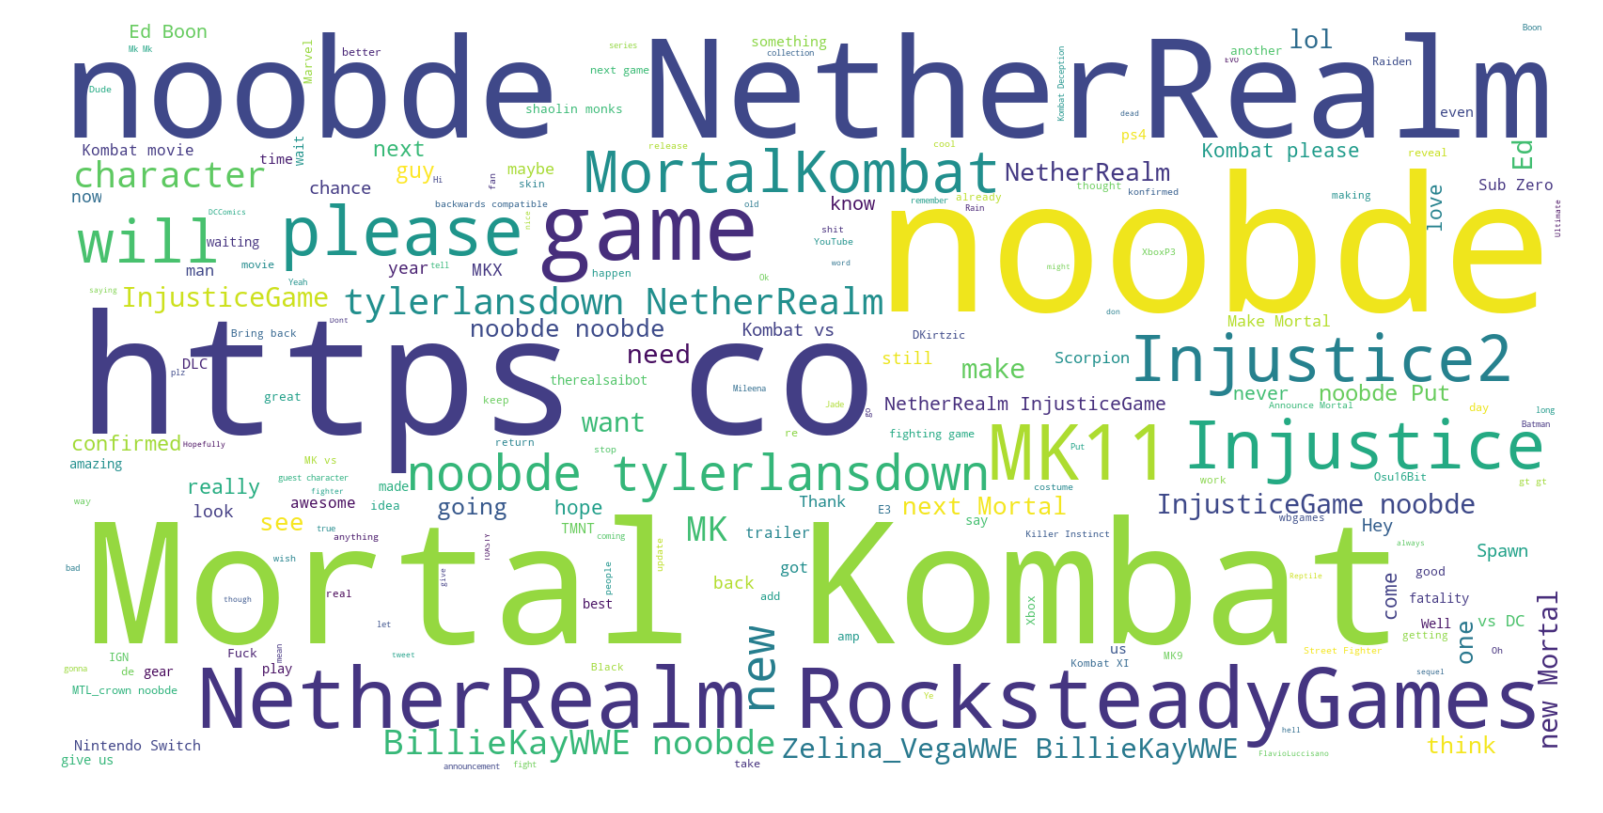

In [59]:
noobde_string = []

for t in noobde.text:
    noobde_string.append(t)
noobde_string = pd.Series(noobde_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",width=1600, height=800,max_font_size=200).generate(noobde_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [45]:
corpus=[]
a=[]
for i in range(len(noobde['text'])):
        a=noobde['text'][i]
        corpus.append(a)
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)

2018-08-11 22:45:05,770 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-08-11 22:45:05,794 : INFO : built Dictionary(3617 unique tokens: ['400?', '@netherrealm', '@noobde', 'anyway', 'fuck']...) from 1066 documents (total 10181 corpus positions)
2018-08-11 22:45:05,804 : INFO : saving Dictionary object under C:\Users\Glynis\AppData\Local\Temp\elon.dict, separately None
2018-08-11 22:45:05,812 : INFO : saved C:\Users\Glynis\AppData\Local\Temp\elon.dict


In [46]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  # store to disk, for later use
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

2018-08-11 22:45:30,232 : INFO : storing corpus in Matrix Market format to C:\Users\Glynis\AppData\Local\Temp\elon.mm
2018-08-11 22:45:30,235 : INFO : saving sparse matrix to C:\Users\Glynis\AppData\Local\Temp\elon.mm
2018-08-11 22:45:30,236 : INFO : PROGRESS: saving document #0
2018-08-11 22:45:30,256 : INFO : PROGRESS: saving document #1000
2018-08-11 22:45:30,259 : INFO : saved 1066x3617 matrix, density=0.260% (10039/3855722)
2018-08-11 22:45:30,273 : INFO : saving MmCorpus index to C:\Users\Glynis\AppData\Local\Temp\elon.mm.index
2018-08-11 22:45:30,281 : INFO : collecting document frequencies
2018-08-11 22:45:30,282 : INFO : PROGRESS: processing document #0
2018-08-11 22:45:30,287 : INFO : calculating IDF weights for 1066 documents and 3616 features (10039 matrix non-zeros)


In [47]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2018-08-11 22:45:59,610 : INFO : using symmetric alpha at 0.2
2018-08-11 22:45:59,612 : INFO : using symmetric eta at 0.2
2018-08-11 22:45:59,614 : INFO : using serial LDA version on this node
2018-08-11 22:45:59,618 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 1066 documents, updating model once every 1066 documents, evaluating perplexity every 1066 documents, iterating 50x with a convergence threshold of 0.001000
2018-08-11 22:45:59,620 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-08-11 22:46:00,313 : INFO : -10.186 per-word bound, 1164.5 perplexity estimate based on a held-out corpus of 1066 documents with 10181 words
2018-08-11 22:46:00,314 : INFO : PROGRESS: pass 0, at document #1066/1066
2018-08-11 22:46:00,803 : INFO : topic #0 (0.200): 0.086*"@noobde" + 0.047*"@netherrealm" + 0.031*"mortal" + 0.026*"kombat" + 0.012*"@rocksteadygames"

(64, 5)
(5, 64)


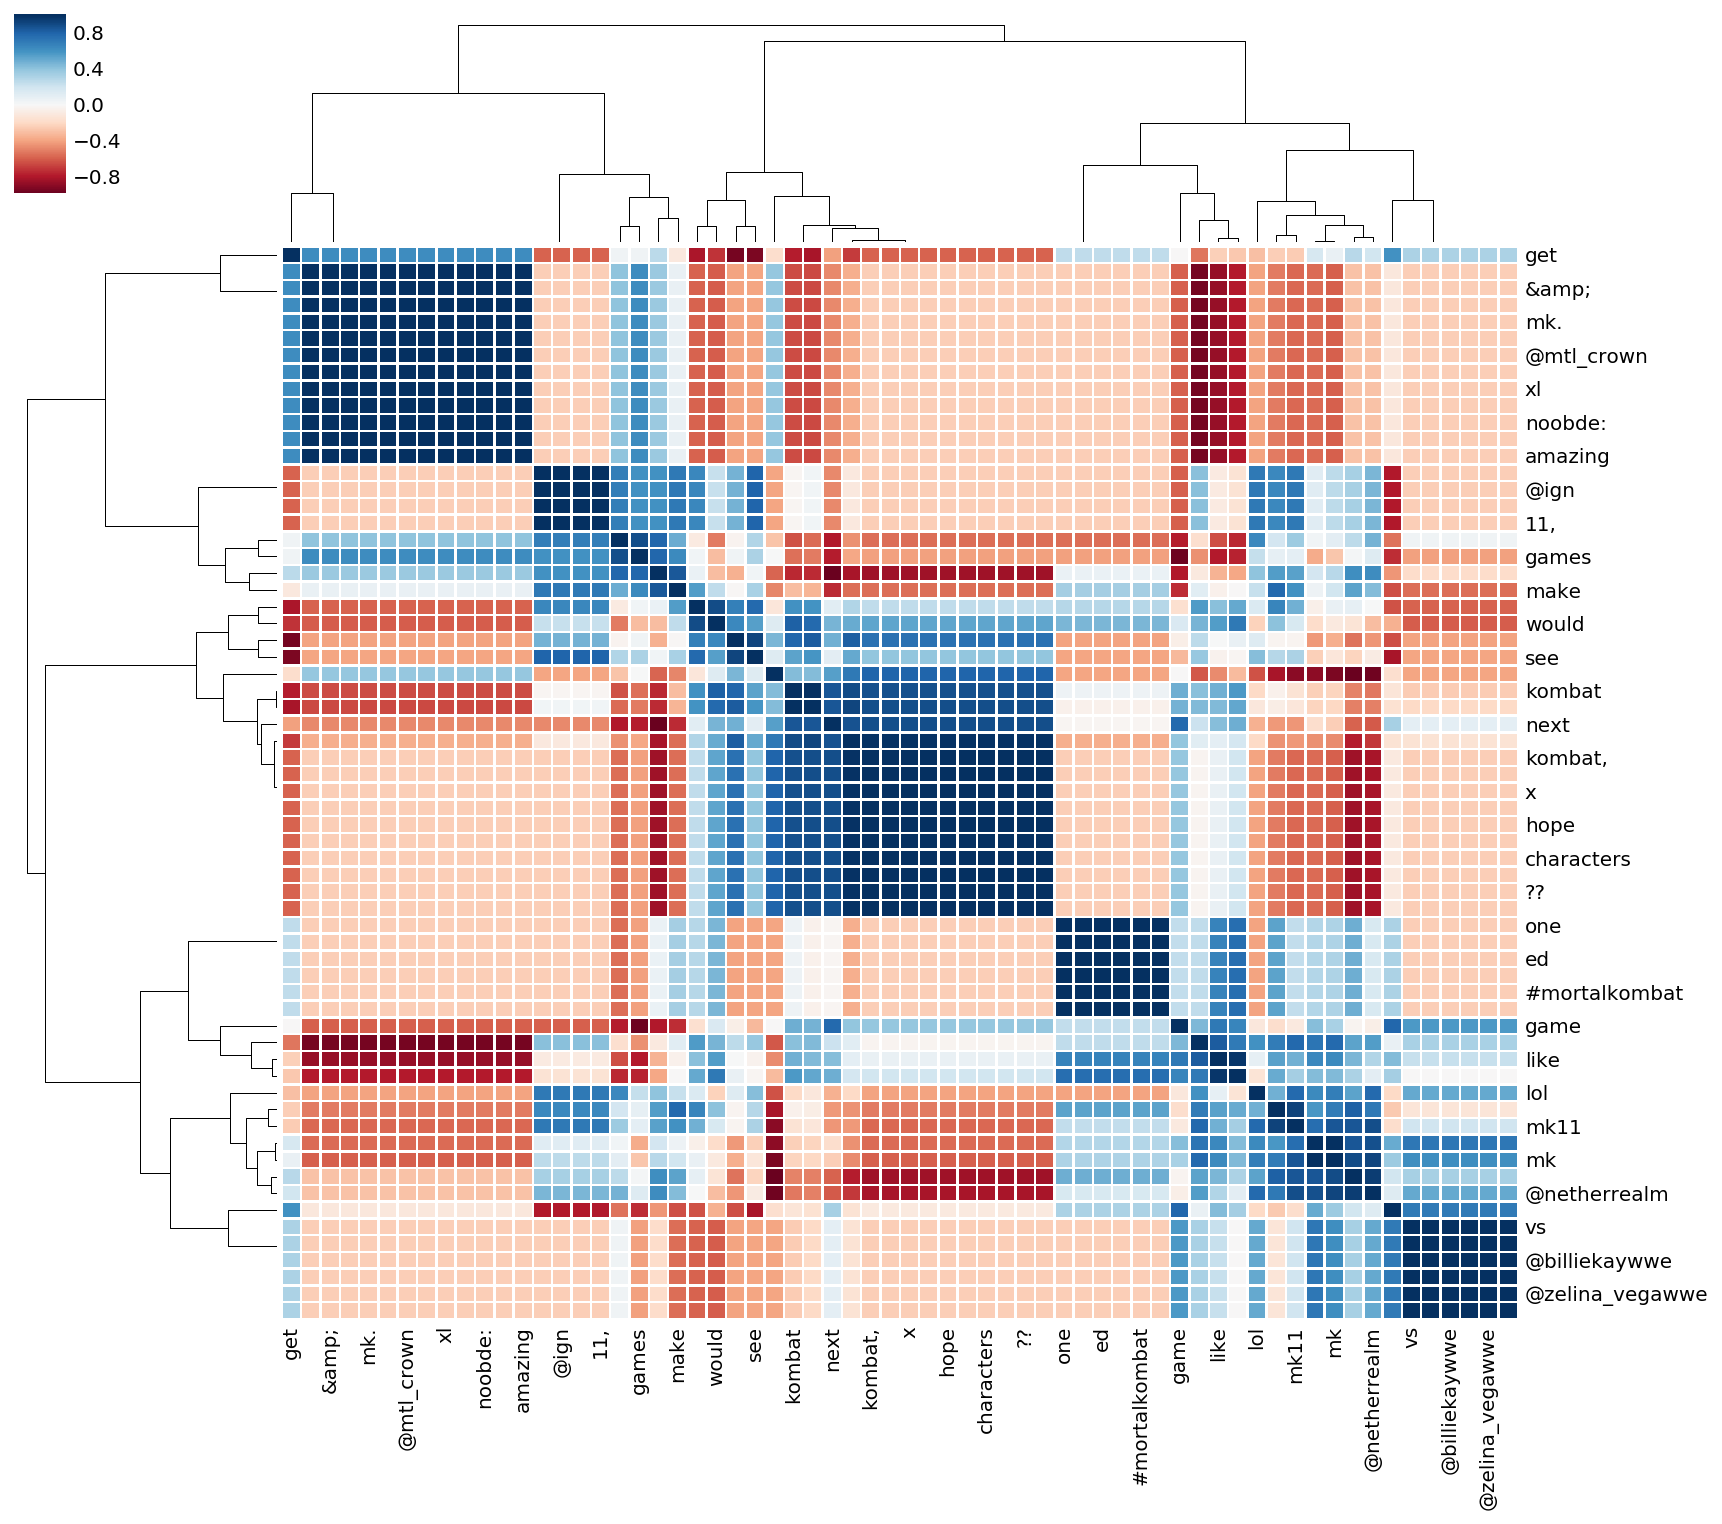

In [48]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda

import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [49]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

C:\Users\Glynis\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0      48.890856        1       1  -59.449306   13.903647
4      20.782108        1       2  -19.136108  -70.450447
1      10.142789        1       3  -75.544937 -140.720718
3      10.096122        1       4 -135.643555  -34.694336
2      10.088126        1       5 -166.618713 -119.593216, topic_info=     Category       Freq              Term      Total  loglift  logprob
term                                                                   
2     Default  83.000000           @noobde  83.000000  30.0000  30.0000
22    Default  31.000000            mortal  31.000000  29.0000  29.0000
21    Default  27.000000            kombat  27.000000  28.0000  28.0000
1     Default  42.000000      @netherrealm  42.000000  27.0000  27.0000
68    Default   4.000000                11   4.000000  26.0000  26.0000
30    Default   8.000000  @rocksteadygames   8.000000  25.0000  25.0000
14    Default   5.000000    @tylerlansdown   5.000000  24.0000  24.0000
120   Default   3.000000              next   3.000000  23.0000  23.0000
100   Default   4.000000               new   4.000000  22.0000  22.0000
1173  Default   0.000000               mk.   0.000000  21.0000  21.0000
185   Default   4.000000              game   4.000000  20.0000  20.0000
96    Default   2.000000     #mortalkombat   2.000000  19.0000  19.0000
78    Default   3.000000               get   3.000000  18.0000  18.0000
700   Default   1.000000        @mtl_crown   1.000000  17.0000  17.0000
15    Default   2.000000   @zelina_vegawwe   2.000000  16.0000  16.0000
13    Default   2.000000     @billiekaywwe   2.000000  15.0000  15.0000
52    Default   3.000000       #injustice2   3.000000  14.0000  14.0000
354   Default   3.000000             would   3.000000  13.0000  13.0000
107   Default   5.000000    @injusticegame   5.000000  12.0000  12.0000
44    Default   1.000000              back   1.000000  11.0000  11.0000
149   Default   2.000000               put   2.000000  10.0000  10.0000
45    Default   0.000000             bring   0.000000   9.0000   9.0000
550   Default   0.000000             movie   0.000000   8.0000   8.0000
416   Default   1.000000               one   1.000000   7.0000   7.0000
6     Default   4.000000         injustice   4.000000   6.0000   6.0000
482   Default   1.000000             could   1.000000   5.0000   5.0000
485   Default   3.000000                mk   3.000000   4.0000   4.0000
117   Default   3.000000             games   3.000000   3.0000   3.0000
141   Default   3.000000            please   3.000000   2.0000   2.0000
484   Default   1.000000              hope   1.000000   1.0000   1.0000
...       ...        ...               ...        ...      ...      ...
700    Topic5   0.614614        @mtl_crown   1.065677   1.7434  -5.1646
865    Topic5   0.250591              shit   0.528302   1.5480  -6.0618
387    Topic5   0.196608              #mkx   0.393134   1.6009  -6.3044
2105   Topic5   0.196545       @iamthelobo   0.393113   1.6006  -6.3047
474    Topic5   0.185507         @tabmok99   0.392304   1.5449  -6.3625
1350   Topic5   0.196777            sequel   0.435352   1.4997  -6.3035
719    Topic5   0.286368          @wbgames   0.838869   1.2190  -5.9283
461    Topic5   0.183637             slots   0.400526   1.5140  -6.3726
78     Topic5   0.664120               get   3.547767   0.6182  -5.0871
1706   Topic5   0.197414                xl   0.462415   1.4427  -6.3003
1      Topic5   2.538159      @netherrealm  42.799400  -0.5313  -3.7464
2      Topic5   3.587778           @noobde  83.056693  -0.8482  -3.4003
624    Topic5   0.196850           noobde:   0.508953   1.3439  -6.3032
1012   Topic5   0.275777             monks   1.131482   0.8821  -5.9660
6      Topic5   0.539537         injustice   4.764966   0.1155  -5.2949
388    Topic5   0.209596           amazing   0.665137   1.1390  -6.2404
1001   Topic5   0.27786

In [53]:
def category(text):
    if tweets[tweets['text'].str.contains("noobde")]:
        return 'noobde'
    else:
        return 'other'


SyntaxError: 'return' outside function (<ipython-input-53-263093dcb166>, line 2)

In [55]:
tweets.loc[tweets['text'].str.contains('noobde'), 'category'] = 'noobde'

In [58]:
tweets.head()

,Unnamed: 0,_id,created_at,display_text_range,filter_level,geo,id_str,lang,text,sentiment,Time,category
0,218269,5ad31adad6de873c94b9a4be,Sun Apr 15 09:26:50 +0000 2018,NaN,low,NaN,9.854490e+17,en,imagine Mortal Kombat remade in this Aurora to...,1,2018-04-15 09:26:50,other
1,505609,5b68ede0d6de875a6a344fd9,Tue Aug 07 00:54:55 +0000 2018,NaN,low,NaN,1.026630e+18,en,"Kenshiro in the next Mortal Kombat as DLC, ple...",1,2018-08-07 00:54:55,other
2,356804,5b333d5fd6de8712755f9787,Wed Jun 27 07:31:43 +0000 2018,NaN,low,NaN,1.011870e+18,en,Why does everyone care about the Mortal Kombat...,1,2018-06-27 07:31:43,other
3,95173,5aa7a32bd6de876753a19f00,Tue Mar 13 10:08:43 +0000 2018,NaN,low,NaN,9.735010e+17,pt,Gostei de um vídeo @YouTube https://t.co/dIxwq...,1,2018-03-13 10:08:43,other
4,1243,5a757794d6de870a371857cd,Sat Feb 03 08:49:24 +0000 2018,NaN,low,NaN,9.600000e+17,en,I liked a @YouTube video https://t.co/dfjkmqwq...,1,2018-02-03 08:49:24,other


In [57]:
tweets['category'] = tweets['text'].apply(lambda x: 'noobde' if 'noodbe' in x else 'other')